In [1]:
# Problem 1

In [149]:
!pip install d2l==1.0.3 #Install new library for use

241938.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [150]:
pip install --upgrade pip #Upgrade the Pip

241945.25s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

In [12]:
class LinearRegressionScratch(d2l.Module): # Set up a new class from Scratch
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=1000): # Define the Standard Deviation to be 0.01
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.zeros((num_inputs, 1), requires_grad=True) #Define the weight value
        self.b = torch.zeros(1, requires_grad=True) # Define the bias value

In [13]:
# Define our model, relating its input and parameters to its output
@d2l.add_to_class(LinearRegressionScratch)  
def forward(self, X):
    return torch.matmul(X, self.w) + self.b # Linear addition of weights to biases using broadcasting

In [14]:
# Defining the loss function
@d2l.add_to_class(LinearRegressionScratch) 
def loss(self, y_hat, y):
    l = (y_hat - d2l.reshape(y, y_hat.shape)).abs().sum() # Use absolute error loss function
    return l # Return averaged loss value among all examples 

In [15]:
# Defining the optimization algorithm
class SGD(d2l.HyperParameters):  #@save
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr): # applies the update, given a set of parameters, a learning rate lr
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_() # The zero_grad method sets all gradients to 0

In [16]:
# Configures optimizers, returns an instance of the SGD class
@d2l.add_to_class(LinearRegressionScratch)  #@save
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

In [17]:
# Set up code to train the data
@d2l.add_to_class(d2l.Trainer) 
def prepare_batch(self, batch):
    return batch

In [18]:
# Main Training Loop
@d2l.add_to_class(d2l.Trainer)  
def fit_epoch(self): # Define the method for training one epoch
    self.model.train() # Set the model to training mode

    for batch in self.train_dataloader: # Iterate over batches in the training data loader
        loss = self.model.training_step(self.prepare_batch(batch)) # Compute the loss for the current batch
        self.optim.zero_grad() # Zero out the gradients stored in the optimizer
        with torch.no_grad(): # Perform operations without tracking gradients
            loss.backward() # Compute gradients and perform a backward pass
            if self.gradient_clip_val > 0: # Clip gradients if specified
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step() # Update the model parameters using the optimizer
        self.train_batch_idx += 1 # Increment the training batch index

    if self.val_dataloader is None: # Check if a validation data loader is provided
        return

    self.model.eval() # Set the model to evaluation mode

    for batch in self.val_dataloader: # Iterate over batches in the validation data loader
        with torch.no_grad(): # Perform operations without tracking gradients
            self.model.validation_step(self.prepare_batch(batch)) # Compute the validation loss for the current batch
        self.val_batch_idx += 1 # Increment the validation batch index


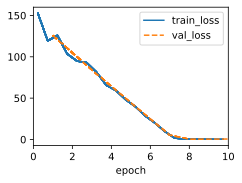

In [30]:
# Using Regular Data
model = LinearRegressionScratch(2, lr=0.001) # Model learning rate 0.03, inputs is 2
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2) # Sets weights and Biases
trainer = d2l.Trainer(max_epochs=10) # Defines the maximum number of epochs
trainer.fit(model, data) # Fits the data

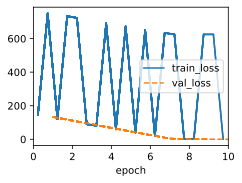

In [38]:
# Using Purturbed Data
model = LinearRegressionScratch(2, lr=0.001) # Model learning rate 0.03, inputs is 2
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2) # Sets weights and Biases
# Perturb y5 to be 10000
data.y[4] = 10000
trainer = d2l.Trainer(max_epochs=10) # Defines the maximum number of epochs
trainer.fit(model, data) # Fits the data

In [ ]:
# Cheap way to combine square loss and absolute value loss: Huber Loss
# def huber_loss(y, y_hat, delta=1.0):
#    absolute_diff = torch.abs(y - y_hat)
#    quadratic_loss = 0.5 * (absolute_diff ** 2)
#    linear_loss = delta * (absolute_diff - 0.5 * delta)

#    loss = torch.where(absolute_diff <= delta, quadratic_loss, linear_loss)
    
#    return loss.mean()

In [31]:
# Compare training parameters to those learned in training loop
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.1359, -0.2084])
error in estimating b: tensor([0.2411])
